In [327]:
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score
from statsmodels.formula.api import Logit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report

In [328]:
import pandas as pd
import numpy as np
import csv
import itertools
from collections import Counter

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.width',5000)

%config InlineBackend.figure_format = 'svg'

#%config InlineBackend.figure_format = 'png'
import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 300

In [330]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score
from sklearn.metrics import classification_report

In [331]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [332]:
df = pd.read_csv('mariners.csv')

In [333]:
df.pitch_type.unique()

array(['FF', 'FC', 'SL', 'CH', 'SI', 'CU', 'FT', 'KC', 'null', 'PO', 'FS'], dtype=object)

In [334]:
df = df[df.pitch_type != 'null']

rf['pitch_type'].value_counts()

FF      5823
SI      4067
FC      3212
CH      3209
SL      2598
CU      1918
FT      1336
KC       874
FS        22
null      18
PO         6
Name: pitch_type, dtype: int64

In [335]:
df = pd.get_dummies(df, columns=["pitch_type"])

In [336]:
df = pd.get_dummies(df, columns=['p_throws'])

In [337]:
df = pd.get_dummies(df, columns=["stand"])

In [338]:
df = pd.get_dummies(df, columns=["outs_when_up"])

In [339]:
df = pd.get_dummies(df, columns=["inning"])

In [340]:
df = pd.get_dummies(df, columns=["if_fielding_alignment"])

In [341]:
df = pd.get_dummies(df, columns=["of_fielding_alignment"])

In [342]:
df.rename(columns={'type':'called'}, inplace=True)

In [343]:
df = pd.get_dummies(df, columns=["called"])

In [344]:
df['breaking'] = df['pitch_type_SL'] + df['pitch_type_CU'] + df['pitch_type_KC']

In [345]:
df['offspeed'] = df['pitch_type_CH'] + df['pitch_type_FS']

In [346]:
df['fastball'] = df['pitch_type_FF'] + df['pitch_type_FT'] + df['pitch_type_SI'] + df['pitch_type_FC']

In [347]:
df.sample(5)

,game_date,release_speed,player_name,batter,pitcher,events,description,zone,home_team,away_team,balls,strikes,on_3b,on_2b,on_1b,inning_topbot,sv_id,effective_speed,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,pitch_type_CH,pitch_type_CU,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_FT,pitch_type_KC,pitch_type_PO,pitch_type_SI,pitch_type_SL,p_throws_L,p_throws_R,stand_L,stand_R,outs_when_up_0,outs_when_up_1,outs_when_up_2,inning_1,inning_2,inning_3,inning_4,inning_5,inning_6,inning_7,inning_8,inning_9,inning_10,inning_11,inning_12,inning_13,if_fielding_alignment_Infield shift,if_fielding_alignment_Standard,if_fielding_alignment_Strategic,if_fielding_alignment_null,of_fielding_alignment_4th outfielder,of_fielding_alignment_Standard,of_fielding_alignment_Strategic,of_fielding_alignment_null,called_B,called_S,called_X,breaking,offspeed,fastball
6179,8/12/18,83.2,Adam Warren,643393,476589,null,foul,4,HOU,SEA,0,1,null,null,null,Bot,180812_195506,82.471,42,2,Slider,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
21606,4/11/18,85,Juan Nicasio,593160,504379,null,ball,14,KC,SEA,0,1,null,null,null,Bot,180411_203510,84.329,62,2,Slider,2,4,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2779,9/8/18,91.5,Alex Colome,543305,517008,null,ball,11,SEA,NYY,1,2,null,null,null,Top,180909_031433,90.433,55,5,Cutter,3,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2828,9/8/18,89.1,Felix Hernandez,457705,433587,null,ball,14,SEA,NYY,0,2,null,null,458731,Top,180909_021653,88.958,33,4,4-Seam Fastball,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
18956,5/1/18,85.7,Juan Nicasio,543760,504379,null,ball,14,SEA,OAK,0,2,null,null,null,Top,180502_044558,84.499,63,3,Slider,3,5,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df.info()

In [ ]:
df.on_3b.unique()

In [348]:
df['on_3b'] = df['on_3b'].replace(['null'], 0)

In [349]:
df['on_2b'] = df['on_2b'].replace(['null'], 0)

In [350]:
df.on_2b = df.on_2b.astype(int)

In [351]:
df.on_3b = df.on_3b.astype(int)

In [352]:
df['on_1b'] = df['on_1b'].replace(['null'], 0)

In [353]:
df.on_1b = df.on_1b.astype(int)

In [354]:
conditions = [
    (df['balls'] == 0) & (df['strikes'] == 0),
    (df['balls'] == 0) & (df['strikes'] == 1),
    (df['balls'] == 0) & (df['strikes'] == 2),
    (df['balls'] == 1) & (df['strikes'] == 0),
    (df['balls'] == 1) & (df['strikes'] == 1),
    (df['balls'] == 1) & (df['strikes'] == 2),
    (df['balls'] == 2) & (df['strikes'] == 0),
    (df['balls'] == 2) & (df['strikes'] == 1),
    (df['balls'] == 2) & (df['strikes'] == 2),
    (df['balls'] == 3) & (df['strikes'] == 0),
    (df['balls'] == 3) & (df['strikes'] == 1),
    (df['balls'] == 3) & (df['strikes'] == 2)
]
choices = ['0-0', '0-1', '0-2','1-0','1-1','1-2','2-0','2-1','2-2','3-0','3-1','3-2']
df['count'] = np.select(conditions, choices)



In [355]:
df = pd.get_dummies(df, columns=["count"])

In [356]:
maxVal = 1
df['on_3b'][df['on_3b'] >= maxVal] = maxVal
df['on_2b'][df['on_2b'] >= maxVal] = maxVal
df['on_1b'][df['on_1b'] >= maxVal] = maxVal

/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the 

In [ ]:
df.sample(5)

In [357]:
df.rename(columns={'if_fielding_alignment_Infield shift':'if_shift'}, inplace=True)

In [358]:
df.rename(columns={'if_fielding_alignment_Standard':'if_standard'}, inplace=True)

In [359]:
df.rename(columns={'if_fielding_alignment_Strategic':'if_strategic'}, inplace=True)

In [360]:
df.rename(columns={'of_fielding_alignment_4th outfielder':'of_fourth'}, inplace=True)

In [361]:
df.rename(columns={'of_fielding_alignment_Standard':'of_standard'}, inplace=True)

In [362]:
df.rename(columns={'of_fielding_alignment_Strategic':'of_strategic'}, inplace=True)

In [363]:
df.drop('if_fielding_alignment_null',axis=1,inplace=True)

In [364]:
df.drop('of_fielding_alignment_null',axis=1,inplace=True)

In [365]:
df['run_diff'] = df['bat_score'] - df['fld_score']

In [366]:
df.sample()

,game_date,release_speed,player_name,batter,pitcher,events,description,zone,home_team,away_team,balls,strikes,on_3b,on_2b,on_1b,inning_topbot,sv_id,effective_speed,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,pitch_type_CH,pitch_type_CU,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_FT,pitch_type_KC,pitch_type_PO,pitch_type_SI,pitch_type_SL,p_throws_L,p_throws_R,stand_L,stand_R,outs_when_up_0,outs_when_up_1,outs_when_up_2,inning_1,inning_2,inning_3,inning_4,inning_5,inning_6,inning_7,inning_8,inning_9,inning_10,inning_11,inning_12,inning_13,if_shift,if_standard,if_strategic,of_fourth,of_standard,of_strategic,called_B,called_S,called_X,breaking,offspeed,fastball,count_0-0,count_0-1,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2,run_diff
2540,9/11/18,93,Shawn Armstrong,543333,542888,null,ball,11,SEA,SD,2,1,0,1,0,Top,180912_034044,93.114,42,4,4-Seam Fastball,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [367]:
df['pitch']=0
df['pitch'][df.offspeed == 1] = 2
df['pitch'][df.breaking == 1] = 1


/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [368]:
df['prev_pitch'] = df['pitch'].shift(-1)

In [369]:
df['prev_pitch'] = df['prev_pitch'].fillna(0)

In [370]:
df['prev_speed'] = df['release_speed'].shift(-1)

In [371]:
df['prev_speed'] = df['prev_speed'].fillna(90)

In [372]:
df['prev_zone'] = df['zone'].shift(-1)

In [373]:
df['prev_ball'] = df['called_B'].shift(-1)

In [374]:
df['prev_strike'] = df['called_S'].shift(-1)

In [375]:
df['prev_ball'] = df['prev_ball'].fillna(0)

In [376]:
df['prev_strike'] = df['prev_strike'].fillna(1)

In [377]:
df.release_speed[df.release_speed == 'null']   = 90

/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [378]:
df.release_speed = df.release_speed.astype(float)

In [382]:
df.zone[df.zone == 'null']   = 14

/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [380]:
df['prev_zone'] = df['prev_zone'].fillna(13)

In [383]:
df.zone = df.zone.astype(int)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23065 entries, 0 to 23082
Data columns (total 84 columns):
game_date          23065 non-null object
release_speed      23065 non-null float64
player_name        23065 non-null object
batter             23065 non-null int64
pitcher            23065 non-null int64
events             23065 non-null object
description        23065 non-null object
zone               23065 non-null int64
home_team          23065 non-null object
away_team          23065 non-null object
balls              23065 non-null int64
strikes            23065 non-null int64
on_3b              23065 non-null int64
on_2b              23065 non-null int64
on_1b              23065 non-null int64
inning_topbot      23065 non-null object
sv_id              23065 non-null object
effective_speed    23065 non-null object
at_bat_number      23065 non-null int64
pitch_number       23065 non-null int64
pitch_name         23065 non-null object
bat_score          23065 non-null int64

In [398]:
df.prev_strike.unique()

array([ 1.,  0.])

In [386]:
df.sample(5)

,game_date,release_speed,player_name,batter,pitcher,events,description,zone,home_team,away_team,balls,strikes,on_3b,on_2b,on_1b,inning_topbot,sv_id,effective_speed,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,pitch_type_CH,pitch_type_CU,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_FT,pitch_type_KC,pitch_type_PO,pitch_type_SI,pitch_type_SL,p_throws_L,p_throws_R,stand_L,stand_R,outs_when_up_0,outs_when_up_1,outs_when_up_2,inning_1,inning_2,inning_3,inning_4,inning_5,inning_6,inning_7,inning_8,inning_9,inning_10,inning_11,inning_12,inning_13,if_shift,if_standard,if_strategic,of_fourth,of_standard,of_strategic,called_B,called_S,called_X,breaking,offspeed,fastball,count_0-0,count_0-1,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2,run_diff,pitch,prev_pitch,prev_speed,prev_zone,prev_ball,prev_strike
6410,8/10/18,90.2,Alex Colome,503556,517008,field_out,hit_into_play,8,HOU,SEA,1,0,0,0,0,Bot,180811_024717,89.422,66,2,Cutter,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-3,0,0.0,95.1,11,1.0,0.0
18075,5/8/18,94.8,James Paxton,546990,572020,null,swinging_strike,2,TOR,SEA,1,0,0,0,1,Bot,180508_235532,93.466,23,2,4-Seam Fastball,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-2,0,0.0,94.7,3,1.0,0.0
12909,6/15/18,82.7,Rob Whalen,502110,547007,null,swinging_strike,14,SEA,BOS,1,1,0,0,0,Top,180616_033015,82.018,34,3,Slider,6,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0.0,90.6,12,1.0,0.0
19686,4/25/18,94.8,James Pazos,570560,572021,null,ball,14,CWS,SEA,0,0,0,0,0,Bot,180425_202859,94.668,63,1,Sinker,3,4,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,0,1.0,80.8,8,0.0,1.0
22593,4/3/18,76.9,Marco Gonzales,452254,594835,null,called_strike,9,SF,SEA,0,0,0,0,0,Bot,180403_222029,75.739,42,1,Curveball,1,6,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-5,1,2.0,83.7,6,0.0,0.0


In [388]:
y = df.zone

In [389]:
X = df[['on_3b','on_2b','on_1b','at_bat_number','pitch_number','p_throws_L','stand_L','if_shift','if_strategic','of_fourth',
        'of_strategic','count_0-1','count_0-2','count_1-0','count_1-1','count_1-2','count_2-0','count_2-1',
        'count_2-2','count_3-0','count_3-1','count_3-2','outs_when_up_1','outs_when_up_2','inning_1',
        'inning_2','inning_3','inning_4','inning_5','inning_6','inning_7','inning_8','inning_9','inning_10',
        'inning_11','inning_12','run_diff','prev_pitch','prev_speed','prev_zone','prev_ball','prev_strike']]

In [326]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 8627), (1, 8627)]


In [319]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


[(0, 8627), (1, 8627)]


In [390]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
est = make_pipeline(StandardScaler(), LogisticRegression())

est.fit(X_resampled_nm1,y_resampled)

y_pred=est.predict(X_resampled_nm1)

train_acc=est.score(X_resampled_nm1, y_resampled)

test_acc=est.score(X_resampled_nm1, y_resampled)

print("Training Data Accuracy: %0.4f" %(train_acc))
print("Test Data Accuracy:     %0.4f" %(test_acc))

y_true = y_test


Training Data Accuracy: 0.6150
Test Data Accuracy:     0.6150


/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [391]:
est = make_pipeline(StandardScaler(), LogisticRegression())

est.fit(X_train,y_train)

y_pred=est.predict(X_test)

train_acc=est.score(X_train, y_train)

test_acc=est.score(X_test,y_test)

print("Training Data Accuracy: %0.4f" %(train_acc))
print("Test Data Accuracy:     %0.4f" %(test_acc))

y_true = y_test


ValueError: could not convert string to float: 'null'

In [321]:
print(classification_report(y_true,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [4613, 17254]

In [223]:
cm = confusion_matrix(y_test,y_pred)
names = ['1','2','3','4','5','6','7','8','9','11','12','13','14']
title='Confusion matrix'

In [322]:
cm = confusion_matrix(y_test,y_pred)
names = ['non-fastball','fastball']
title='Confusion matrix'

ValueError: Found input variables with inconsistent numbers of samples: [4613, 17254]

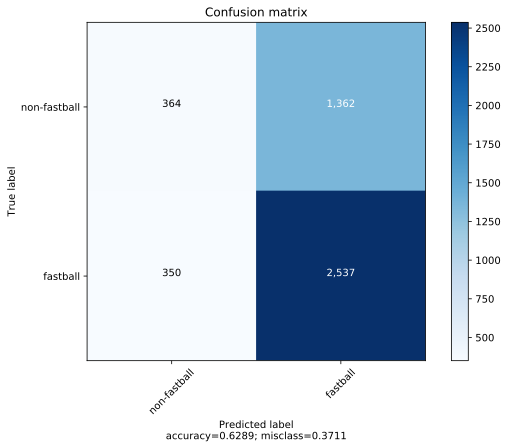

In [315]:
plot_confusion_matrix(cm,names,normalize=False)

In [314]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html    

In [271]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23065 entries, 0 to 23082
Data columns (total 42 columns):
on_3b             23065 non-null int64
on_2b             23065 non-null int64
on_1b             23065 non-null int64
at_bat_number     23065 non-null int64
pitch_number      23065 non-null int64
p_throws_L        23065 non-null uint8
stand_L           23065 non-null uint8
if_shift          23065 non-null uint8
if_strategic      23065 non-null uint8
of_fourth         23065 non-null uint8
of_strategic      23065 non-null uint8
count_0-1         23065 non-null uint8
count_0-2         23065 non-null uint8
count_1-0         23065 non-null uint8
count_1-1         23065 non-null uint8
count_1-2         23065 non-null uint8
count_2-0         23065 non-null uint8
count_2-1         23065 non-null uint8
count_2-2         23065 non-null uint8
count_3-0         23065 non-null uint8
count_3-1         23065 non-null uint8
count_3-2         23065 non-null uint8
outs_when_up_1    23065 non-null 

In [276]:
def makecost(obs,prob,falsepos_cost,falseneg_cost):
    def cost(cutoff):
        pred = np.array(prob > cutoff)
        fpos = pred * (1 - obs) 
        fneg = (1 - pred) * obs
        return np.sum(fpos * falsepos_cost + fneg * falseneg_cost)
    return np.vectorize(cost)

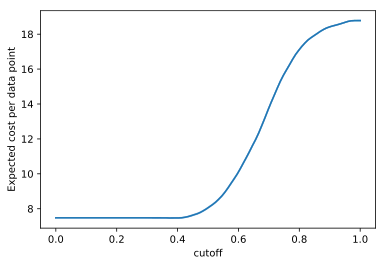

In [286]:
cut = np.linspace(0,1,100)
cost = np.zeros_like(cut)
from sklearn.model_selection import KFold, cross_val_predict
obs = np.ravel(y)

K = 20
for j in range(K):
    folds = KFold(n_splits=5,shuffle=True)
    prob = cross_val_predict(logreg,X,np.ravel(y),cv=folds,method='predict_proba',n_jobs=5)[:,1]
    getcost = makecost(obs,prob,falsepos_cost=20,falseneg_cost=30)
    currentcost = getcost(cut)/X.shape[0]
    cost += currentcost
    plt.plot(cut, currentcost,c='C0',alpha=0.05)
cost /= K
plt.plot(cut,cost,c='C0')
plt.xlabel('cutoff')
plt.ylabel('Expected cost per data point');

In [287]:
bestcut = cut[np.argmin(cost)]
bestcut

0.37373737373737376

/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


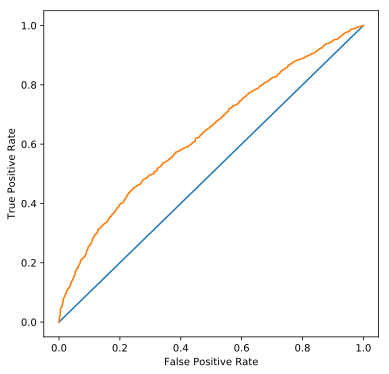

In [288]:
# What about ROC ? 

from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)
logreg = LogisticRegression()
logreg.fit(xtrain,np.ravel(ytrain))
y_score=logreg.predict_proba(xtest)[:,1]

fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [137]:
df['breaking'].value_counts()

0    17675
1     5390
Name: breaking, dtype: int64

In [138]:
df['offspeed'].value_counts()

0    19834
1     3231
Name: offspeed, dtype: int64

In [139]:
df['fastball'].value_counts()

1    14438
0     8627
Name: fastball, dtype: int64

In [140]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      2888
           1       0.33      0.02      0.04      1069
           2       0.33      0.01      0.02       656

   micro avg       0.63      0.63      0.63      4613
   macro avg       0.43      0.34      0.27      4613
weighted avg       0.52      0.63      0.49      4613



In [292]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.xticks(range(cm.shape[1]))
    plt.yticks(range(cm.shape[0]))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(clf,x,y):
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.4f" %(train_acc))
    print("Test Data Accuracy:     %0.4f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)
    

    conf = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall= recall_score(y_true, y_pred)
    
    print(conf)
    
    print('\n')
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:0.4f}")
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

/Users/alexanderbell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Accuracy: 0.6342
Test Data Accuracy:     0.6378
[[ 389 1317]
 [ 354 2553]]


Precision: 0.6597
Recall:    0.8782


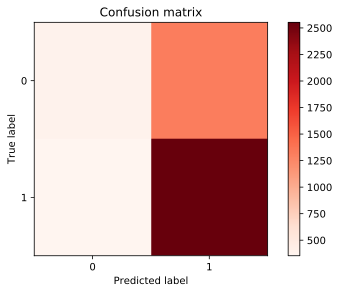

In [293]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

In [143]:
def makecost(obs,prob,falsepos_cost,falseneg_cost):
    def cost(cutoff):
        pred = np.array(prob > cutoff)
        fpos = pred * (1 - obs) 
        fneg = (1 - pred) * obs
        return np.sum(fpos * falsepos_cost + fneg * falseneg_cost)
    return np.vectorize(cost)

In [ ]:
cut = np.linspace(0,1,100)
cost = np.zeros_like(cut)
from sklearn.model_selection import KFold, cross_val_predict
obs = np.ravel(y)

K = 20
for j in range(K):
    folds = KFold(n_splits=5,shuffle=True)
    prob = cross_val_predict(logreg,X,np.ravel(y),cv=folds,method='predict_proba',n_jobs=5)[:,1]
    getcost = makecost(obs,prob,falsepos_cost=20,falseneg_cost=25)
    currentcost = getcost(cut)/X.shape[0]
    cost += currentcost
    plt.plot(cut, currentcost,c='C0',alpha=0.05)
cost /= K
plt.plot(cut,cost,c='C0')
plt.xlabel('cutoff')
plt.ylabel('Expected cost per data point');

In [ ]:
# visualize .6 cutoff (lowest point of the previous plot)
cm_info <- ConfusionMatrixInfo( data = data_test, predict = "prediction", 
                                actual = "left", cutoff = .6 )
ggthemr("flat")
cm_info$plot

In [ ]:
df.to_csv("sea_2018.csv")

In [ ]:
paxton_df = df.loc[df['pitcher'] == 572020]

In [ ]:
paxton_df.sample()

In [ ]:
paxton_df['fastball'].value_counts()

In [ ]:
paxton_df['breaking'].value_counts()

In [ ]:
paxton_df['offspeed'].value_counts()

In [ ]:
XX = paxton_df[['on_3b','on_2b','on_1b','inning','stand_L','if_shift','if_strategic','of_fourth',
        'of_strategic','count_0-1','count_0-2','count_1-0','count_1-1','count_1-2','count_2-0','count_2-1',
        'count_2-2','count_3-0','count_3-1','count_3-2','run_diff','outs_when_up_1','outs_when_up_2']]

In [ ]:
yy = paxton_df.breaking

In [ ]:
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(XX, yy, test_size=0.3, random_state=42)

In [ ]:
est = make_pipeline(StandardScaler(), LogisticRegression())

est.fit(XX_train,yy_train)

yy_pred=est.predict(XX_test)

train_acc=est.score(XX_train, yy_train)

test_acc=est.score(XX_test,yy_test)

print("Training Data Accuracy: %0.4f" %(train_acc))
print("Test Data Accuracy:     %0.4f" %(test_acc))

yy_true = yy_test


In [ ]:
print(classification_report(yy_true,yy_pred))

In [ ]:
confusion_matrix(yy_test,yy_pred)

In [ ]:
 X

In [ ]:
y

In [ ]:
y = df[['fastball','breaking','offspeed']]

In [ ]:
df['pitch']=0
df['pitch'][df.fastball == 1] = 2
df['pitch'][df.breaking == 1] = 1


In [ ]:
df.head()

In [ ]:
obs = np.ravel(y)

In [ ]:
obs

In [ ]:
feat = np.array(X)

In [ ]:
feat

In [ ]:
felix_df = df.loc[df['pitcher'] == 433587]

In [ ]:
felix_df.head()

In [ ]:
X = felix_df[['on_3b','on_2b','on_1b','stand_L','if_shift','if_strategic','of_fourth',
        'of_strategic','count_0-1','count_0-2','count_1-0','count_1-1','count_1-2','count_2-0','count_2-1',
        'count_2-2','count_3-0','count_3-1','count_3-2','run_diff','outs_when_up_1','outs_when_up_2','inning_1',
        'inning_2','inning_3','inning_4','inning_5','inning_6','inning_7','inning_8','inning_9','inning_10',
        'inning_11','inning_12','prev_pitch']]

In [ ]:
y = felix_df.pitch

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
est = make_pipeline(StandardScaler(), LogisticRegression())

est.fit(X_train,y_train)

y_pred=est.predict(X_test)

train_acc=est.score(X_train, y_train)

test_acc=est.score(X_test,y_test)

print("Training Data Accuracy: %0.5f" %(train_acc))
print("Test Data Accuracy:     %0.5f" %(test_acc))

y_true = y_test


In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
title='Confusion matrix'

In [ ]:
plot_confusion_matrix(cm,names,normalize=False)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html    

In [ ]:
felix_df['prev_pitch'] = felix_df['pitch'].shift(-1)

In [ ]:
felix_df.head()

In [ ]:
felix_df['prev_pitch'] = felix_df['prev_pitch'].fillna(0)

In [ ]:
print(classification_report(y_true,y_pred))

In [294]:
df.head()

,game_date,release_speed,player_name,batter,pitcher,events,description,zone,home_team,away_team,balls,strikes,on_3b,on_2b,on_1b,inning_topbot,sv_id,effective_speed,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,pitch_type_CH,pitch_type_CU,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_FT,pitch_type_KC,pitch_type_PO,pitch_type_SI,pitch_type_SL,p_throws_L,p_throws_R,stand_L,stand_R,outs_when_up_0,outs_when_up_1,outs_when_up_2,inning_1,inning_2,inning_3,inning_4,inning_5,inning_6,inning_7,inning_8,inning_9,inning_10,inning_11,inning_12,inning_13,if_shift,if_standard,if_strategic,of_fourth,of_standard,of_strategic,breaking,offspeed,fastball,count_0-0,count_0-1,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2,run_diff,pitch,prev_pitch,prev_speed,prev_zone,called_B,called_S,called_X,prev_ball,prev_strike,fneg_cost,fpos_cost
0,9/30/18,95.2,Shawn Armstrong,593643,542888,field_out,hit_into_play,13,SEA,TEX,2,2,0,0,0,Top,180930_215050,94.993,62,9,4-Seam Fastball,1,3,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-2,0,0.0,92.7,14.0,0,0,1,0.0,1.0,25,20
1,9/30/18,92.7,Shawn Armstrong,593643,542888,null,foul,14,SEA,TEX,2,2,0,0,0,Top,180930_212412,92.456,62,8,Cutter,1,3,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-2,0,0.0,95.8,8.0,0,1,0,0.0,1.0,25,20
2,9/30/18,95.8,Shawn Armstrong,593643,542888,null,foul,8,SEA,TEX,2,2,0,0,0,Top,180930_212340,95.773,62,7,4-Seam Fastball,1,3,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-2,0,1.0,87.7,9.0,0,1,0,0.0,1.0,25,20
3,9/30/18,87.7,Shawn Armstrong,593643,542888,null,foul,9,SEA,TEX,2,2,0,0,0,Top,180930_212321,87.174,62,6,Slider,1,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-2,1,0.0,95.6,3.0,0,1,0,0.0,1.0,25,20
4,9/30/18,95.6,Shawn Armstrong,593643,542888,null,foul,3,SEA,TEX,2,2,0,0,0,Top,180930_212256,95.692,62,5,4-Seam Fastball,1,3,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-2,0,0.0,95.6,4.0,0,1,0,0.0,1.0,25,20


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23065 entries, 0 to 23082
Data columns (total 84 columns):
game_date          23065 non-null object
release_speed      23065 non-null float64
player_name        23065 non-null object
batter             23065 non-null int64
pitcher            23065 non-null int64
events             23065 non-null object
description        23065 non-null object
zone               23065 non-null int64
home_team          23065 non-null object
away_team          23065 non-null object
balls              23065 non-null int64
strikes            23065 non-null int64
on_3b              23065 non-null int64
on_2b              23065 non-null int64
on_1b              23065 non-null int64
inning_topbot      23065 non-null object
sv_id              23065 non-null object
effective_speed    23065 non-null object
at_bat_number      23065 non-null int64
pitch_number       23065 non-null int64
pitch_name         23065 non-null object
bat_score          23065 non-null int64

In [298]:
df.drop('fneg_cost',axis=1,inplace=True)

In [299]:
df.drop('fpos_cost',axis=1,inplace=True)

In [301]:
df.to_csv('mariners_pitch.csv')